# Proyecto Machine Learning  - The Bridge - Joaquín Villar 🚀

# Análisis de Préstamos - Declaración del Problema 📊
---------
## Introducción 📑
Las empresas del sector financiero especializadas en préstamos ofrecen diversas soluciones de financiamiento a sus clientes. Estas compañías enfrentan un desafío clave: evaluar la solvencia de los solicitantes para minimizar el riesgo de impago.

Este caso de estudio proporcionará una visión sobre cómo se abordan problemas empresariales reales mediante Análisis Exploratorio de Datos (EDA) y Machine Learning. Además, permitirá desarrollar una comprensión básica de la analítica de riesgos en el sector bancario y financiero, y cómo los datos pueden utilizarse para reducir las pérdidas en la concesión de préstamos.

-----------
## Entendimiento del Negocio 📝
Trabajas en una empresa de préstamos que debe decidir si aprueba o no una solicitud en función del perfil del solicitante. Esta decisión implica dos riesgos principales:
- Pérdida de negocio: Si el solicitante tiene capacidad para pagar el préstamo, pero su solicitud es rechazada, la empresa pierde una oportunidad de generar ingresos.
- Pérdida financiera: Si el solicitante no tiene capacidad para pagar y se aprueba el préstamo, la empresa sufre una pérdida económica.

El conjunto de datos proporcionado contiene información sobre solicitantes de préstamos anteriores y si incumplieron o no con sus pagos. El objetivo es identificar patrones que indiquen la probabilidad de que una persona no pague su préstamo. Esta información permitirá tomar decisiones como:
- Negar la solicitud de préstamo.
- Reducir el monto del préstamo.
- Ofrecer el préstamo con una tasa de interés más alta a solicitantes de alto riesgo.

## Tipos de decisiones al evaluar una solicitud de préstamo 💰
1. Préstamo aprobado: Si la empresa aprueba la solicitud, pueden darse tres escenarios:
- Totalmente pagado: El solicitante ha cumplido con el pago total del préstamo (capital e intereses).
- En proceso de pago: El solicitante sigue pagando sus cuotas, pero aún no ha completado el período del préstamo. Estos clientes no se consideran incumplidores.
- Incumplimiento (Charged-off): El solicitante no ha realizado los pagos en el tiempo estipulado durante un período prolongado, lo que indica un incumplimiento del préstamo.

2. Préstamo rechazado: Si la empresa decide no otorgar el préstamo, no existe historial de transacciones para estos solicitantes, por lo que estos datos no están disponibles en el conjunto de datos.
----------------
## Objetivos del Negocio 🎯
Las empresas del sector financiero buscan facilitar préstamos personales, comerciales y financiamiento para diversos fines a través de plataformas ágiles y digitales. Sin embargo, como en cualquier empresa de préstamos, otorgar créditos a solicitantes de alto riesgo es una de las principales fuentes de pérdidas financieras, conocidas como pérdidas crediticias.

Estas pérdidas ocurren cuando un prestatario no paga su deuda, generando un impacto negativo en la empresa. En este caso, los clientes etiquetados como "charged-off" representan a los incumplidores que generan la mayor cantidad de pérdidas.

El objetivo principal del análisis es identificar a los clientes de alto riesgo para reducir la cantidad de préstamos otorgados a estos perfiles y minimizar las pérdidas crediticias. Esto se logrará utilizando técnicas de Análisis Exploratorio de Datos (EDA) y Machine Learning.

En otras palabras, la empresa busca comprender los factores que impulsan el incumplimiento de pagos, es decir, las variables clave que predicen si un solicitante es propenso a no pagar su préstamo. Este conocimiento se utilizará para mejorar la evaluación de riesgos y la gestión de la cartera de préstamos.·

--------------

# 1. Carga de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data_sample/lending_club_loan_two.csv")

In [3]:
df = data.copy()

In [4]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Descripción de las Columnas del Dataset
| #  | Columna                  | Descripción                                                                                                                                 | Tipo        |
|----|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| 0  | `loan_amnt`              | El monto del préstamo solicitado por el cliente. Si el monto del préstamo es reducido por el departamento de crédito, se reflejará aquí.   | numérico    |
| 1  | `term`                   | El número de pagos del préstamo. Los valores son en meses y pueden ser 36 o 60.                                                               | numérico    |
| 2  | `int_rate`               | Tasa de interés del préstamo.                                                                                                                 | numérico    |
| 3  | `installment`            | El pago mensual que debe realizar el cliente si el préstamo se origina.                                                                  | numérico    |
| 4  | `grade`                  | Grado asignado al préstamo por la entidad.                                                                                                           | texto       |
| 5  | `sub_grade`              | Subgrado asignado al préstamo por la entidad.                                                                                                        | texto       |
| 6  | `emp_title`              | El título del trabajo proporcionado por el cliente al solicitar el préstamo.                                                             | texto       |
| 7  | `emp_length`             | La duración del empleo en años. Los valores posibles van de 0 a 10, donde 0 significa menos de un año y 10 significa diez o más años.         | numérico    |
| 8  | `home_ownership`         | El estado de propiedad de la vivienda proporcionado por el cliente.                      | texto       |
| 9  | `annual_inc`             | El ingreso anual proporcionado por el cliente.                                                              | numérico    |
| 10 | `verification_status`    | Indica si el ingreso fue verificado por la entidad, no verificado, o si la fuente de ingreso fue verificada.                                          | texto       |
| 11 | `issue_d`                | El mes en el que se financió el préstamo.                                                                                                     | fecha       |
| 12 | `loan_status`            | El estado actual del préstamo. (0: Charged Off, 1: Fully Paid)                                                                                                                | texto       |
| 13 | `purpose`                | Una categoría proporcionada por el cliente para la solicitud del préstamo.                                                                | texto       |
| 14 | `title`                  | El título del préstamo proporcionado por el cliente.                                                                                     | texto       |
| 15 | `zip_code`               | Los primeros 3 números del código postal proporcionado por el cliente en la solicitud del préstamo.                                       | texto       |
| 16 | `addr_state`             | El estado proporcionado por el cliente en la solicitud del préstamo.                                                                     | texto       |
| 17 | `dti`                    | Una proporción calculada usando los pagos mensuales totales de deuda sobre las obligaciones totales de deuda, excluyendo el préstamo.       | numérico    |
| 18 | `earliest_cr_line`       | El mes en que se abrió la línea de crédito más antigua reportada del cliente.                                                              | fecha       |
| 19 | `open_acc`               | El número de líneas de crédito abiertas por el cliente.                                                             | numérico    |
| 20 | `pub_rec`                | Número de registros públicos negativos.                                                                                                       | numérico    |
| 21 | `revol_bal`              | El saldo total del crédito resuelto.                                                                                                         | numérico    |
| 22 | `revol_util`             | La tasa de utilización de la línea del crédito resuelto, es decir, la cantidad de crédito que el cliente está utilizando en relación con el crédito disponible. | numérico    |
| 23 | `total_acc`              | El número total de líneas de crédito actualmente en el archivo de créditos del cliente.                                                    | numérico    |
| 24 | `initial_list_status`    | El estado inicial de listado del préstamo. Los valores posibles son: W, F.                                                                    | texto       |
| 25 | `application_type`       | Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.                                           | texto       |
| 26 | `mort_acc`               | Número de cuentas hipotecarias.                                                                                                               | numérico    |
| 27 | `pub_rec_bankruptcies`   | Número de quiebras en registros públicos.                                                                                                     | numérico    |
| 28 | `address`                | Dirección proporcionada por el cliente en la solicitud del préstamo.                                                                     | texto       |


# 2. Problema de Machine Learning: Clasificación
Buscamos predecir el estado del préstamo, que corresponde a la columna "loan_status" (0: préstamo incobrable , 1: préstamo pagado o en proceso de pago). Se trata de un problema de **Clasificación Binaria**.

# 3. Análisis de la Distribución del Target

In [6]:
target = "loan_status"

In [7]:
df[target].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

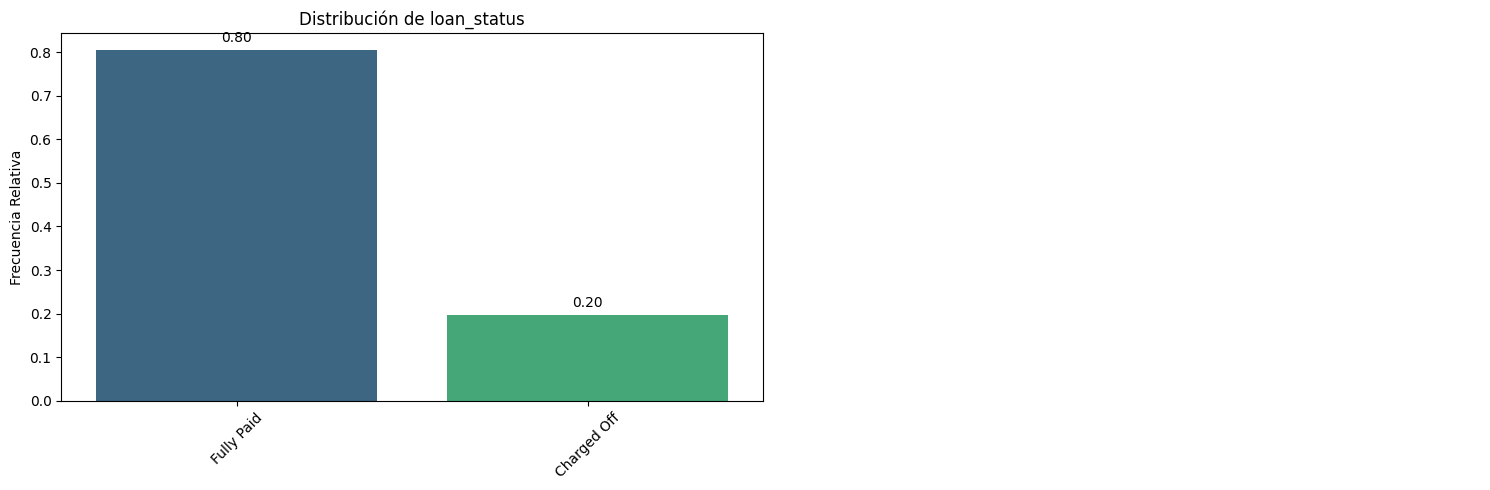

In [8]:
bt.pinta_distribucion_categoricas(df, [target], relativa=True, mostrar_valores= True)

Target desbalanceado, aplicaremos técnica oversampling sobre la clase minoritaria.

# 4. Comprensión de Variables

In [9]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
loan_amnt,float64,0.0,1397,0.35
term,object,0.0,2,0.0
int_rate,float64,0.0,566,0.14
installment,float64,0.0,55706,14.07
grade,object,0.0,7,0.0
sub_grade,object,0.0,35,0.01
emp_title,object,5.79,173105,43.71
emp_length,object,4.62,11,0.0
home_ownership,object,0.0,6,0.0


In [10]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## 4.1. Limpieza y transformación - ETL

In [11]:
emp_length_dic = {
    "10+ years": 10,
    "< 1 year": 0,
    "1 year": 1,
    "2 years": 2,
    "3 years": 3,
    "4 years": 4,
    "5 years": 5,
    "6 years": 6,
    "7 years": 7,
    "8 years": 8,
    "9 years": 9
}

df["emp_length"] = df["emp_length"].map(emp_length_dic)

In [12]:
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")

In [13]:
# Convertir columna objetivo en binaria
loan_status_binario = {'Fully Paid': 1, 'Charged Off': 0} 
df[target] = df[target].map(loan_status_binario).astype(int, errors='ignore')

In [14]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y")

# 5. Feature Red. Preliminar

## 5.1. Features Repetidas

In [15]:
df = df.drop(columns=["issue_d"])
df = df.drop(columns=["title"])
df = df.drop(columns=["earliest_cr_line"])

## 5.2. Identificadores/Columnas Únicas

In [16]:
df = df.drop(columns=["address"])

## 5.3. Feature selection
### 5.3.1. Correlación Lineal

In [17]:
numeric_cols = df.select_dtypes(include=["int32" , "int64" , "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

loan_status             1.000000
int_rate                0.247758
revol_util              0.082373
mort_acc                0.073111
dti                     0.062413
loan_amnt               0.059836
annual_inc              0.053432
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
total_acc               0.017893
emp_length              0.013734
revol_bal               0.010892
pub_rec_bankruptcies    0.009383
Name: loan_status, dtype: float64

In [19]:
good_corr_feat = corr[corr > 0.05].index.values # Guardar columnas con correlación > 0.05

In [20]:
good_corr_feat

array(['loan_status', 'int_rate', 'revol_util', 'mort_acc', 'dti',
       'loan_amnt', 'annual_inc'], dtype=object)

In [21]:
bad_corr_feat = corr[corr < 0.05].index.values # Eliminar variables con correlación < 0.05
df.drop(columns=bad_corr_feat, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  object 
 2   int_rate             396030 non-null  float64
 3   grade                396030 non-null  object 
 4   sub_grade            396030 non-null  object 
 5   emp_title            373103 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   loan_status          396030 non-null  int32  
 10  purpose              396030 non-null  object 
 11  dti                  396030 non-null  float64
 12  revol_util           395754 non-null  float64
 13  initial_list_status  396030 non-null  object 
 14  application_type     396030 non-null  object 
 15  mort_acc         

# 6. Análisis Univariante

## 6.1. Variables Categóricas

In [23]:
df[target] = df[target].astype(object, errors='ignore')

In [24]:
cat_col = df.select_dtypes(include=["object"]).columns
cat_col

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

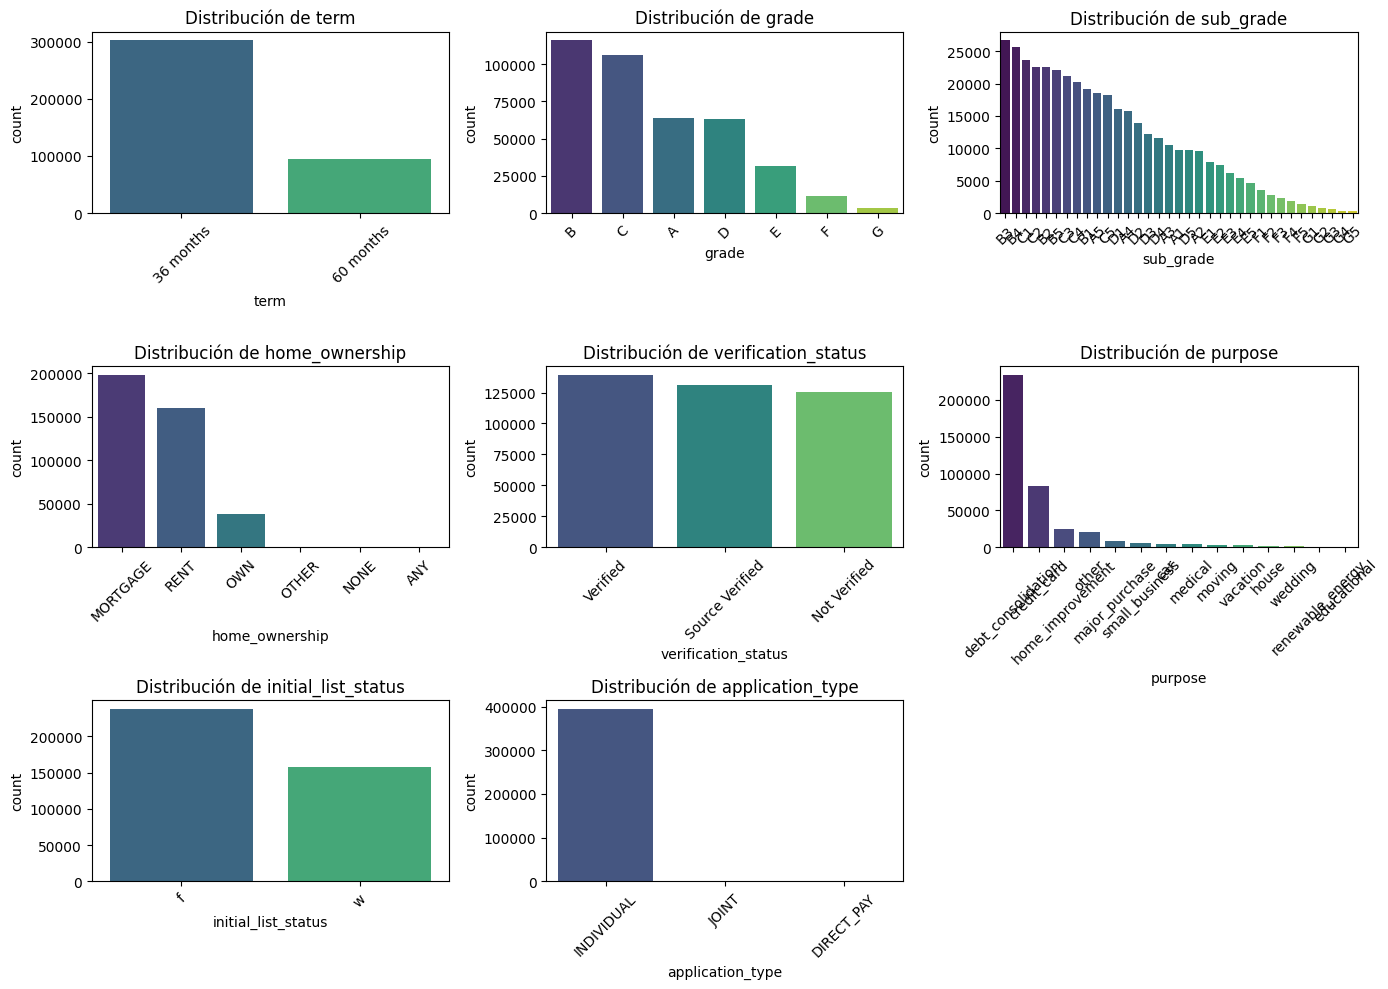

In [25]:
cat_col = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
            'purpose', 'initial_list_status', 'application_type']

plt.figure(figsize=(14, 10))
for i, var in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {var}")
plt.tight_layout()
plt.show()

## 6.2. Variables Numéricas

In [26]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

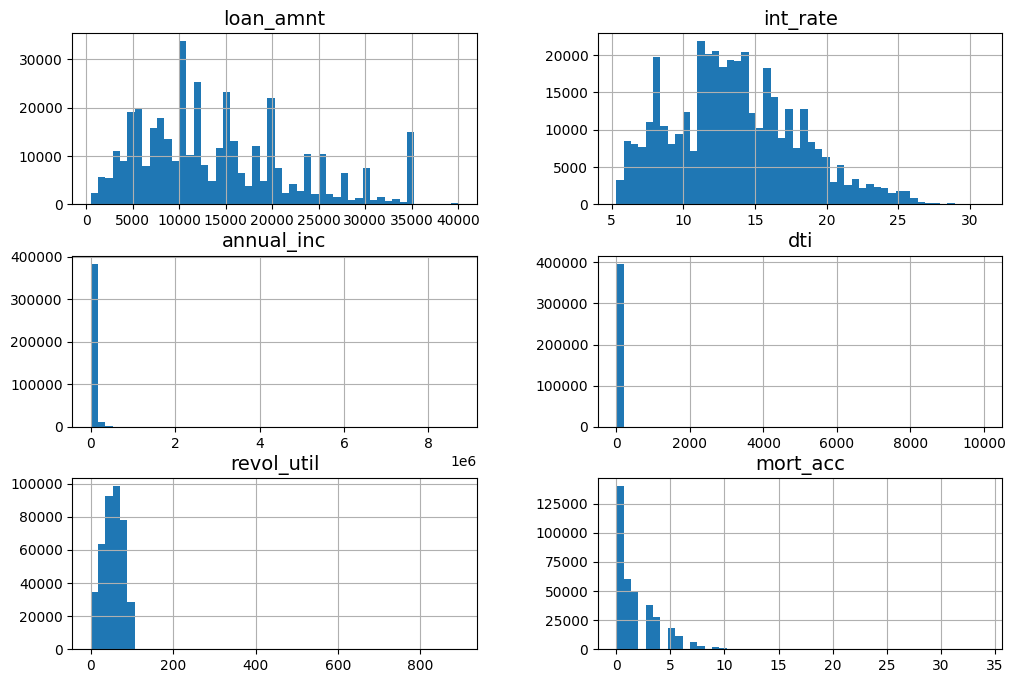

In [27]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

array([[<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'annual_inc'}>]], dtype=object)

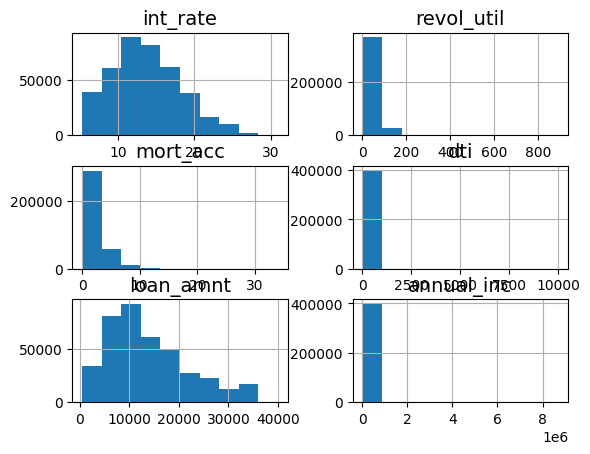

In [28]:
df[features_num].hist()

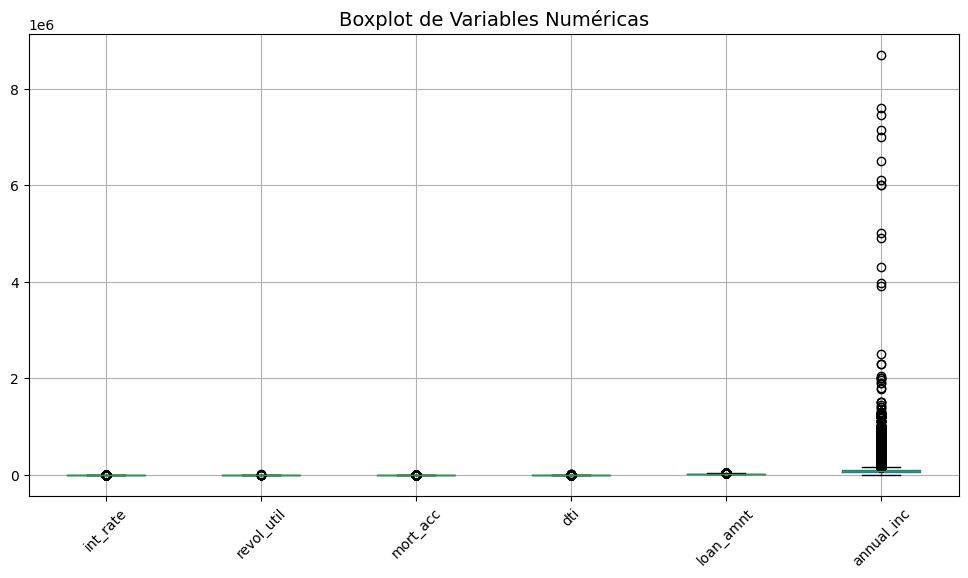

In [29]:
# Boxplots para ver valores atípicos
plt.figure(figsize=(12, 6))
df[features_num].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Numéricas")
plt.show()

In [87]:
# Boxplots para ver valores atípicos
plt.figure(figsize=(12, 6))
df["annual_inc"].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot de Variables Numéricas")
plt.show()

AttributeError: 'Series' object has no attribute 'boxplot'

<Figure size 1200x600 with 0 Axes>

In [30]:
df[features_num].describe()

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
count,396030.000000,395754.000000,358235.000000,396030.000000,396030.000000,3.960300e+05
mean,13.639400,53.791749,1.813991,17.379514,14113.888089,7.420318e+04
std,4.472157,24.452193,2.147930,18.019092,8357.441341,6.163762e+04
min,5.320000,0.000000,0.000000,0.000000,500.000000,0.000000e+00
25%,10.490000,35.800000,0.000000,11.280000,8000.000000,4.500000e+04
50%,13.330000,54.800000,1.000000,16.910000,12000.000000,6.400000e+04
75%,16.490000,72.900000,3.000000,22.980000,20000.000000,9.000000e+04
max,30.990000,892.300000,34.000000,9999.000000,40000.000000,8.706582e+06


# 7. Análisis Bivariante

## 7.1. Correlation matrix/heatmap con Target

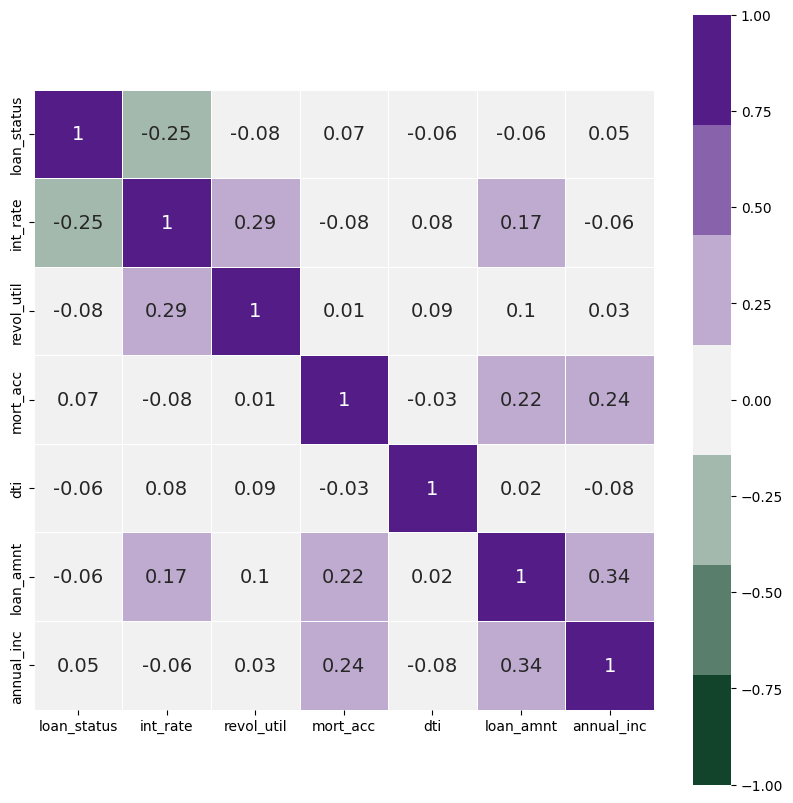

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

## 7.2. Correlation matrix/heatmap sin Target

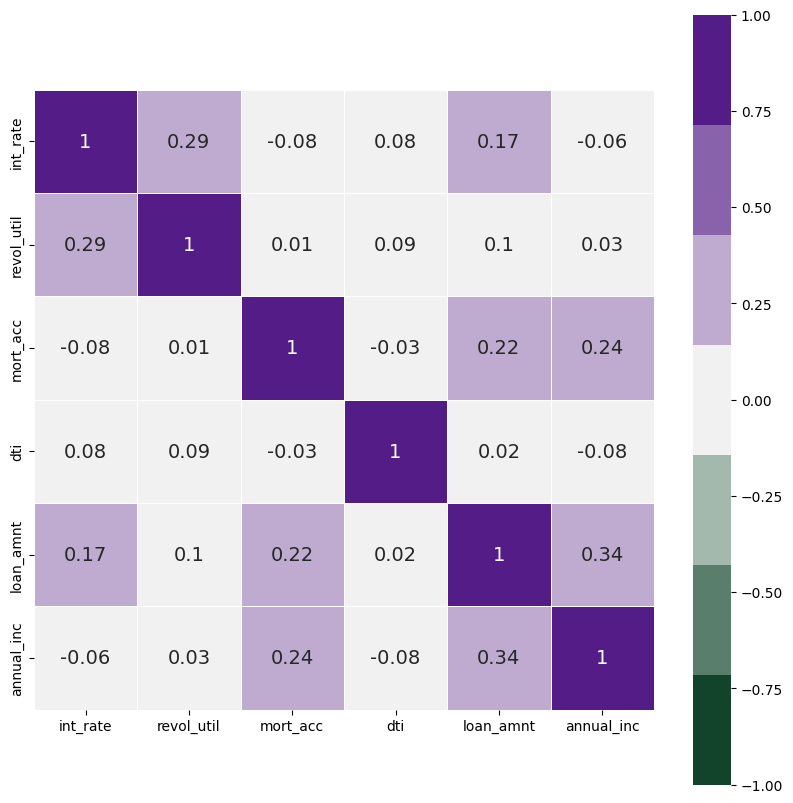

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[features_num].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

# 8. Eliminación de features

In [33]:
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

In [34]:
features_cat = ["term", "grade", "home_ownership",
       "verification_status", "purpose",
       "initial_list_status", "application_type"]
features_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [35]:
data_report(df[features_num + features_cat])

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.07,9.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,1397,27197,2,7,6,3,14,2,3
CARDIN (%),0.14,0.31,0.01,1.08,0.35,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Duplicados

In [36]:
duplicate_rows = df.duplicated(keep="first")
len(df[duplicate_rows])

0

In [37]:
df = df.drop_duplicates()

In [38]:
len(df.duplicated(keep="first"))

396030

# 9. Missing

In [39]:
df = df[features_num + features_cat]

In [40]:
# Imputar la mediana
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["mort_acc"] = df["mort_acc"].fillna(df["mort_acc"].median())

In [41]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,1397,27197,2,7,6,3,14,2,3
CARDIN (%),0.14,0.31,0.01,1.08,0.35,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Outliers

In [42]:
# Suponiendo que df es tu DataFrame
Q1 = df[['loan_amnt', 'annual_inc']].quantile(0.25)  # Primer cuartil (25%)
Q3 = df[['loan_amnt', 'annual_inc']].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites para outliers (1.5 veces el IQR por encima y por debajo)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar valores fuera de estos límites
outliers = ((df[['loan_amnt', 'annual_inc']] < lower_bound) | 
            (df[['loan_amnt', 'annual_inc']] > upper_bound))

# Mostrar el número de outliers en cada columna
print(outliers.sum())

loan_amnt       191
annual_inc    16700
dtype: int64


In [43]:
# Filtrar el DataFrame eliminando los outliers
df_sin_outliers = df[~((df[['loan_amnt', 'annual_inc']] < lower_bound) | 
                        (df[['loan_amnt', 'annual_inc']] > upper_bound)).any(axis=1)]

# Mostrar el tamaño antes y después
print(f"Tamaño original: {df.shape}")
print(f"Tamaño sin outliers: {df_sin_outliers.shape}")

Tamaño original: (396030, 13)
Tamaño sin outliers: (379210, 13)


In [44]:
df = df_sin_outliers.copy()

In [45]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,564,1214,29,4258,1381,25909,2,7,6,3,14,2,3
CARDIN (%),0.15,0.32,0.01,1.12,0.36,6.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# # Imputar la media
# df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())
# df["revol_util"] = df["revol_util"].fillna(df["revol_util"].mean())
# df["mort_acc"] = df["mort_acc"].fillna(df["mort_acc"].mean())
# df["dti"] = df["dti"].fillna(df["dti"].mean())
# df["loan_amnt"] = df["loan_amnt"].fillna(df["loan_amnt"].mean())
# df["annual_inc"] = df["annual_inc"].fillna(df["annual_inc"].mean())

# 10. Feature Engineering
## 10.1. Escalados

In [47]:
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

In [48]:
data_report(df[features_num])

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
DATA_TYPE,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,564,1214,29,4258,1381,25909
CARDIN (%),0.15,0.32,0.01,1.12,0.36,6.83


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalamos en una copia
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_num]), columns=features_num)

# Asignamos manteniendo los índices originales
df[features_num] = df_scaled.values  

# Verificamos si ahora hay NaN
print(df[features_num].isnull().sum())  # Esto debe dar 0


int_rate      0
revol_util    0
mort_acc      0
dti           0
loan_amnt     0
annual_inc    0
dtype: int64


In [50]:
df.describe()

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
count,3.792100e+05,3.792100e+05,3.792100e+05,3.792100e+05,3.792100e+05,3.792100e+05
mean,-1.474731e-16,-6.043576e-16,-4.489492e-17,9.898993e-17,-1.127526e-16,3.559740e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.874814e+00,-2.206044e+00,-8.379606e-01,-9.615921e-01,-1.637959e+00,-2.257563e+00
25%,-6.848492e-01,-7.361136e-01,-8.379606e-01,-3.301707e-01,-7.641485e-01,-7.450348e-01
50%,-7.639536e-02,3.991131e-02,-3.361642e-01,-2.401050e-02,-2.125943e-01,-1.904412e-01
75%,6.465646e-01,7.789826e-01,6.674284e-01,3.045251e-01,6.333287e-01,5.994346e-01
max,3.888658e+00,3.443136e+01,1.521952e+01,5.447240e+02,3.009969e+00,3.036286e+00


In [51]:
data_report(df[features_num])

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
DATA_TYPE,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,564,1214,29,4258,1381,25909
CARDIN (%),0.15,0.32,0.01,1.12,0.36,6.83


## 10.2. Encondings

In [52]:
features_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [53]:
data_report(df[features_cat])

COL_N,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
DATA_TYPE,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,7,6,3,14,2,3
CARDIN (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.preprocessing import OrdinalEncoder


grade_ord = [["A", "B", "C", "D", "E", "F", "G"]]

encoder = OrdinalEncoder(categories=grade_ord)
df["grade"] = encoder.fit_transform(df[["grade"]])

In [55]:
features_cat = [feature for feature in features_cat if feature not in ["grade" , "title"]]
features_cat

['term',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [56]:
df = pd.get_dummies(df, columns=features_cat,dtype=int)
df.head(5)

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,grade,term_ 36 months,term_ 60 months,home_ownership_ANY,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,-0.500741,-0.489756,-0.837961,0.470430,-0.460484,1.675010,1.0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,-0.377254,-0.017572,0.667428,0.241765,-0.708373,-0.072800,1.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,-0.714037,1.579643,-0.837961,-0.263590,0.233607,-0.810342,1.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,-1.612124,-1.323265,-0.837961,-0.819700,-0.807529,-0.442529,0.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.808220,0.659910,-0.336164,0.891196,1.321222,-0.408917,2.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


# 11. División en Train y Test

In [57]:
df[target] = data["loan_status"]

In [58]:
# loan_status_binario = {'Fully Paid': 1, 'Charged Off': 0} 
df[target] = df[target].map(loan_status_binario).astype(int, errors='ignore')

In [59]:
df[target].value_counts()

loan_status
1    303888
0     75322
Name: count, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379210 entries, 0 to 396029
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   int_rate                             379210 non-null  float64
 1   revol_util                           379210 non-null  float64
 2   mort_acc                             379210 non-null  float64
 3   dti                                  379210 non-null  float64
 4   loan_amnt                            379210 non-null  float64
 5   annual_inc                           379210 non-null  float64
 6   grade                                379210 non-null  float64
 7   term_ 36 months                      379210 non-null  int32  
 8   term_ 60 months                      379210 non-null  int32  
 9   home_ownership_ANY                   379210 non-null  int32  
 10  home_ownership_MORTGAGE              379210 non-null  int32  
 11  home_ownership_NON

In [61]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,grade,term_ 36 months,term_ 60 months,home_ownership_ANY,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,...,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,564,1214,29,4258,1381,25909,7,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CARDIN (%),0.15,0.32,0.01,1.12,0.36,6.83,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1) 
y = df['loan_status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df[target] , random_state=42)

In [63]:
print(X_train.isnull().sum().sum())  # Contar valores NaN en X_train
print(X_test.isnull().sum().sum())   # Contar valores NaN en X_test

0
0


In [64]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Ajustamos las etiquetas correspondientes

In [65]:
y_train.value_counts()

loan_status
1    243110
0     60258
Name: count, dtype: int64

In [66]:
y_test.value_counts()

loan_status
1    60778
0    15064
Name: count, dtype: int64

# 16. Métricas para clasificación - Matriz de confusión
Utilizaremos la matriz de confusión para medir nuestro modelo, con especial atención en el recall ya que lo que buscamos es minimizar los FN (Falsos Negativos).

Recall (Sensibilidad para "Charged Off"): Mide cuántos de los préstamos impagos (Charged Off = 0) fueron correctamente identificados.
Queremos un recall alto, ya que minimizar los falsos positivos significa menos clientes de alto riesgo aprobados por error. **recall = TP / (TP + FN)**

# 17. Decidir qué modelos
## 17.1. Modelos baseline (Logistic Regression, Random Forest, Xgboost) 

In [67]:
# Metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, make_scorer)

In [68]:
# Función para entrenar y evaluar modelos
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Charged Off', 'Fully Paid'], yticklabels=['Charged Off', 'Fully Paid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [69]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.52      0.08      0.13     15064
           1       0.81      0.98      0.89     60778

    accuracy                           0.80     75842
   macro avg       0.67      0.53      0.51     75842
weighted avg       0.75      0.80      0.74     75842



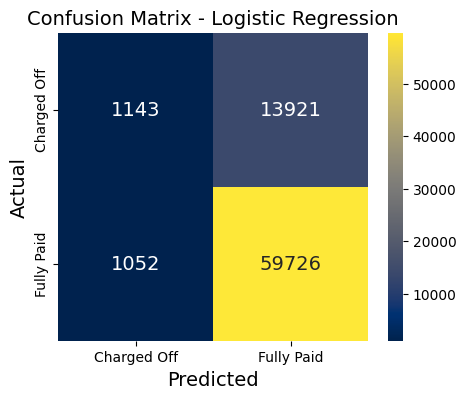

In [70]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate(log_reg, "Logistic Regression")


Model: Random Forest
              precision    recall  f1-score   support

           0       0.48      0.10      0.17     15064
           1       0.81      0.97      0.89     60778

    accuracy                           0.80     75842
   macro avg       0.65      0.54      0.53     75842
weighted avg       0.75      0.80      0.74     75842



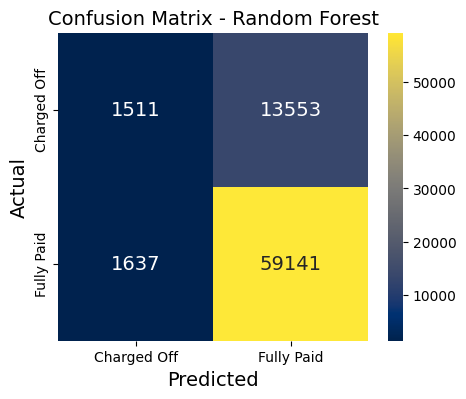

In [71]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf, "Random Forest")


Model: XGBoost
              precision    recall  f1-score   support

           0       0.53      0.08      0.14     15064
           1       0.81      0.98      0.89     60778

    accuracy                           0.80     75842
   macro avg       0.67      0.53      0.52     75842
weighted avg       0.76      0.80      0.74     75842



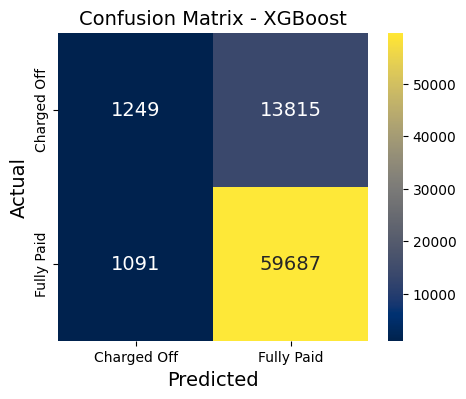

In [72]:
# Modelo 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
train_and_evaluate(xgb, "XGBoost")

## 17.2. Modelos (Logistic Regression, Random Forrest, Xgboost) con `UnderSampler`

In [73]:
# pip install imbalanced-learn

In [74]:
from imblearn.under_sampling import RandomUnderSampler


under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_UNDER, y_UNDER = under_sampler.fit_resample(X_train, y_train)

# Verificamos la nueva distribución de clases
print(pd.Series(y_UNDER).value_counts())

loan_status
0    60258
1    60258
Name: count, dtype: int64


In [75]:
y_UNDER.value_counts(True)

loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64

In [76]:
y_train.value_counts()

loan_status
1    243110
0     60258
Name: count, dtype: int64

In [ ]:
# Función para entrenar y evaluar modelos con UNDER
def train_and_evaluate_UNDER(model, name):
    model.fit(X_UNDER, y_UNDER)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    # print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Charged Off', 'Fully Paid'], yticklabels=['Charged Off', 'Fully Paid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


Model: Logistic Regression with UNDER
              precision    recall  f1-score   support

           0       0.32      0.63      0.43     15064
           1       0.88      0.67      0.76     60778

    accuracy                           0.66     75842
   macro avg       0.60      0.65      0.59     75842
weighted avg       0.77      0.66      0.69     75842



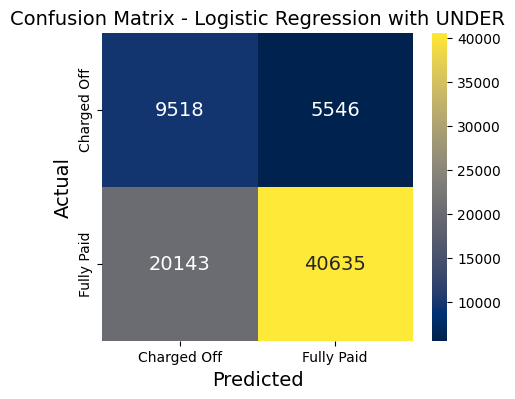

In [78]:
# Modelo 4: Regresión Logística con UNDER
log_reg_UNDER = LogisticRegression(max_iter=1000)
train_and_evaluate_UNDER(log_reg_UNDER, "Logistic Regression with UNDER")


Model: Random Forest with UNDER
              precision    recall  f1-score   support

           0       0.30      0.66      0.41     15064
           1       0.88      0.63      0.73     60778

    accuracy                           0.63     75842
   macro avg       0.59      0.64      0.57     75842
weighted avg       0.77      0.63      0.67     75842



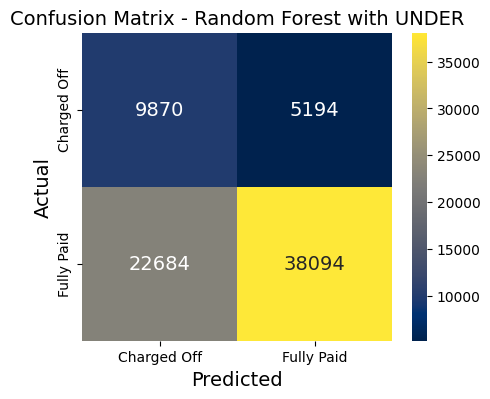

In [79]:
# Modelo 5: Random Forest con UNDER
rf_UNDER = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_UNDER(rf_UNDER, "Random Forest with UNDER")


Model: XGBoost with UNDER
              precision    recall  f1-score   support

           0       0.32      0.65      0.43     15064
           1       0.88      0.65      0.75     60778

    accuracy                           0.65     75842
   macro avg       0.60      0.65      0.59     75842
weighted avg       0.77      0.65      0.68     75842



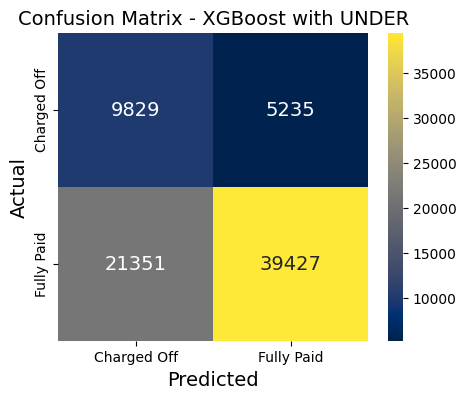

In [80]:
# Modelo 6: XGBoost con UNDER
xgb_UNDER = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
train_and_evaluate_UNDER(xgb_UNDER, "XGBoost with UNDER")

## 17.3. Evaluamos Modelos

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
# Resultados iniciales de los modelos base (creamos un diccionario para después poder hacer una tabla de comparación)
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", 
              "Logistic Regression with UNDER", "Random Forest with UNDER", "XGBoost with UNDER"],
    # "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [84]:
# Evaluar los modelos base sin UNDER
for name, model in [("Logistic Regression", log_reg), ("Random Forest", rf), ("XGBoost", xgb)]:
    y_pred = model.predict(X_test)
    # model_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_results["Precision"].append(precision_score(y_test, y_pred, pos_label=0))  
    model_results["Recall"].append(recall_score(y_test, y_pred, pos_label=0))        
    model_results["F1-Score"].append(f1_score(y_test, y_pred, pos_label=0)) 

In [85]:
# Evaluar los modelos con UNDER
for name, model in [("Logistic Regression with UNDER", log_reg_UNDER), 
                    ("Random Forest with UNDER", rf_UNDER), 
                    ("XGBoost with UNDER", xgb_UNDER)]:
    y_pred = model.predict(X_test)
    # model_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_results["Precision"].append(precision_score(y_test, y_pred, pos_label=0))  # Cambiado a clase 0
    model_results["Recall"].append(recall_score(y_test, y_pred, pos_label=0))        # Cambiado a clase 0
    model_results["F1-Score"].append(f1_score(y_test, y_pred, pos_label=0))

In [86]:
resultados = pd.DataFrame(model_results)
resultados

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.520729,0.075876,0.132453
1,Random Forest,0.479987,0.100305,0.165935
2,XGBoost,0.533761,0.082913,0.143530
3,Logistic Regression with UNDER,0.320893,0.631837,0.425623
4,Random Forest with UNDER,0.303189,0.655204,0.414549
5,XGBoost with UNDER,0.315234,0.652483,0.425093


# 18. Optimización de Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## 18.1. Optimización `sin SMOTE`

In [ ]:
# Definir hiperparámetros
param_grid = {
    'logreg': {
        'C': np.logspace(-4, 4, 10),  # Menos valores para acelerar
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'random_forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

In [ ]:
def optimize_model_not_smote(X_train, y_train, model_name):
    model_dict = {
        'logreg': LogisticRegression(max_iter=1000, random_state=42),
        'random_forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
        'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    model = model_dict[model_name]
    
    # Cross-validation estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    search = GridSearchCV(model, param_grid[model_name], cv=cv, scoring='balanced_accuracy', n_jobs=-1)
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_


In [ ]:
results_not_smote = []
models = ['logreg', 'random_forest', 'xgb']

for model in models:
    best_params, _ = optimize_model_not_smote(X_train, y_train, model)  # Obtener mejores hiperparámetros
    
    # Instanciar el modelo con los mejores hiperparámetros
    model_dict = {
        'logreg': LogisticRegression(**best_params, max_iter=1000, random_state=42),
        'random_forest': RandomForestClassifier(**best_params, random_state=42, class_weight="balanced"),
        'xgb': XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    best_model = model_dict[model]
    best_model.fit(X_train, y_train)  # Entrenar modelo con los mejores hiperparámetros
    y_pred = best_model.predict(X_test)  # Predecir con el modelo entrenado
    
    results_not_smote.append({
        'Model': model,
        'Best Params': best_params,
        # 'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=0),
        'Recall': recall_score(y_test, y_pred, pos_label=0),
        'F1-Score': f1_score(y_test, y_pred, pos_label=0)
    })

In [ ]:
results_df_not_smote = pd.DataFrame(results_not_smote)
results_df_not_smote

## 18.2. Optimización `con SMOTE`

In [ ]:
# def optimize_model_with_smote(X_train_SMOTE, y_train_SMOTE, model_name):
#     model_dict = {
#         'logreg': LogisticRegression(max_iter=1000, random_state=42),
#         'random_forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
#         'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
#     }
    
#     model = model_dict[model_name]
    
#     # Cross-validation estratificada
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     search = GridSearchCV(model, param_grid[model_name], cv=cv, scoring='balanced_accuracy', n_jobs=-1)
#     search.fit(X_train_SMOTE, y_train_SMOTE)
#     return search.best_params_, search.best_score_

In [ ]:
# # Ejecutar optimización para los tres modelos
# results_with_smote = []
# models = ['logreg', 'random_forest', 'xgb']
# for model in models:
#     best_params, best_score = optimize_model_not_smote(X_train_SMOTE, y_train_SMOTE, model)
#     results_with_smote.append({
#         'Model': model,
#         'Best Params': best_params,
#         'Best Score (Recall)': best_score
#     })

In [ ]:
# results_df_with_smote = pd.DataFrame(results_with_smote)
# results_df_with_smote